<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_3/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 10/13/2025 <br>
ECGR 4105 - Homework 3, Problem 2

# Part A)<br>
Normal logistic regression

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer #Import dataset from sklearn

In [ ]:
#Import dataset, manipulate into useful dataframe
cancer = load_breast_cancer()
cancer_data = cancer.data #assign X values
cancer_input = pd.DataFrame(cancer_data)
cancer_labels = cancer.target #assign Y values
labels = np.reshape(cancer_labels,(569,1))
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)

#Convert to data frame
cancer_dataset = pd.DataFrame(final_cancer_data)

#Configure feature labels
features = cancer.feature_names
features_labels = np.append(features,'label')
cancer_dataset.columns = features_labels

#Convert numeric output to classification
cancer_dataset.replace({'label': {0: 'Benign', 1: 'Malignant'}}, inplace=True)

cancer_dataset.tail() #print tail since it shows benign and malignant

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [ ]:
#Assign input and output variables
X = cancer_dataset.iloc[:, 0:30].values #input
Y = cancer_dataset.iloc[:, 30].values #output
#print(Y[560:]) #ensure data was assigned correctly

In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.80, random_state = 0)

In [ ]:
#Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
#Obtain predictions from trained model
Y_pred = classifier.predict(X_test) #based on eval dataset
print("Predicted values: ", Y_pred[:6])
print("Actual values:    ", Y_test[:6]) #compare predicted values to actual values

Predicted values:  ['Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant']
Actual values:     ['Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant']


In [ ]:
#Dive deeper into performance characteristics
from sklearn import metrics
acc = metrics.accuracy_score(Y_test, Y_pred)
pre = metrics.precision_score(Y_test, Y_pred, pos_label='Malignant')
rec = metrics.recall_score(Y_test, Y_pred, pos_label='Malignant')
F1 = metrics.f1_score(Y_test, Y_pred, pos_label='Malignant')

print(f"Accuracy:  {acc:.3f}")
print(f"Precision:  {pre:.3f}")
print(f"Recall:  {rec:.3f}")
print(f"F1 Score:  {F1:.3f}")

Accuracy:  0.963
Precision:  0.959
Recall:  0.983
F1 Score:  0.971


Text(0.5, 427.9555555555555, 'Predicted label')

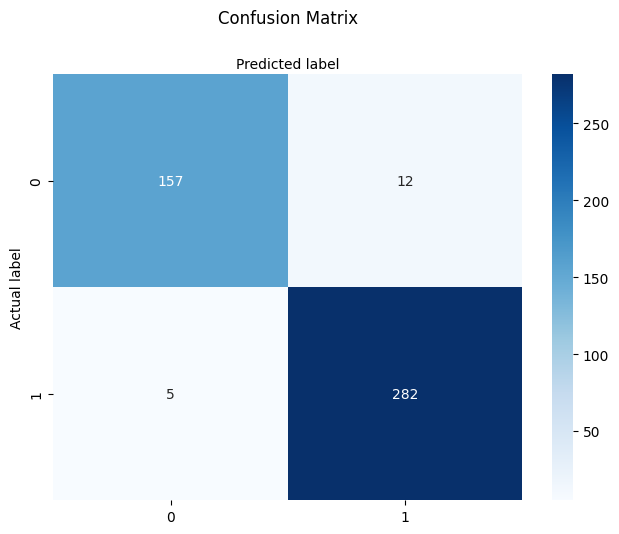

In [ ]:
#Construct confusion matrix to assess model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred) #'cm' = confusion matrix

#Visualize confusion matrix
import seaborn as sns
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Apply heatmap
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Part B)<br>
Add a penalty parameter

In [ ]:
#Repeat training with a penalty parameter
C = [10, 1, .1, .001]
C = [10] #produced the highest test accuracy

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print(f"Training accuracy: , {clf.score(X_train, Y_train):.3f}")
    print(f"Test accuracy:', {clf.score(X_test, Y_test):.3f}")
    print('')

C: 10
Training accuracy: , 1.000
Test accuracy:', 0.961



In [ ]:
#Obtain predictions from trained model
Y_pred = clf.predict(X_test) #based on eval dataset
print("Predicted values: ", Y_pred[:6])
print("Actual values:    ", Y_test[:6]) #compare predicted values to actual values

Predicted values:  ['Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant']
Actual values:     ['Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant']


In [ ]:
#Dive deeper into performance characteristics
acc = metrics.accuracy_score(Y_test, Y_pred)
pre = metrics.precision_score(Y_test, Y_pred, pos_label='Malignant')
rec = metrics.recall_score(Y_test, Y_pred, pos_label='Malignant')
F1 = metrics.f1_score(Y_test, Y_pred, pos_label='Malignant')

print(f"Accuracy:  {acc:.3f}")
print(f"Precision:  {pre:.3f}")
print(f"Recall:  {rec:.3f}")
print(f"F1 Score:  {F1:.3f}")

Accuracy:  0.961
Precision:  0.962
Recall:  0.976
F1 Score:  0.969


Text(0.5, 427.9555555555555, 'Predicted label')

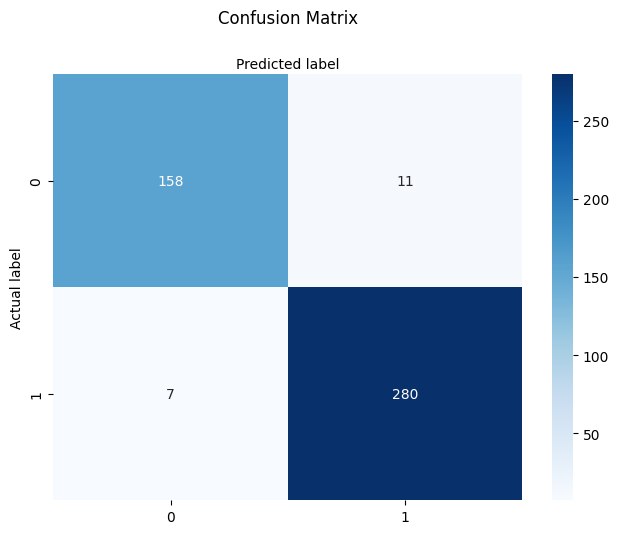

In [ ]:
#Construct confusion matrix to assess model performance
cm = confusion_matrix(Y_test, Y_pred)

#Visualize confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Apply heatmap
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')